<a href="https://colab.research.google.com/github/HimashiBal/Predicting-Shark-Habitats/blob/main/random_forest_dc_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
old_df=pd.read_csv('/content/drive/MyDrive/SHARK DATA/processed data/final_cleaned_data.csv')

In [ ]:
null_count = old_df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 3


In [ ]:
df = old_df.dropna()

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
def my_func(g):
    if g < 1 and g > 0.6:
      return "bad"
    if g < 0.6 and g > 0.4:
      return "decent"
    if g < 0.4:
      return "good"
    #This function can be longer and do more things
    return np.nan if year < 2020 else a + ( ( (b + c) / (b + c + d) ) * e )


df['G'] = df.apply( lambda x: my_func( x.g), axis = 1 )

<ipython-input-7-60dcac96349e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['G'] = df.apply( lambda x: my_func( x.g), axis = 1 )


In [ ]:
print(df['G'])

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
8207    bad
8208    bad
8209    bad
8210    bad
8211    bad
Name: G, Length: 8212, dtype: object


In [ ]:
df.head(10)

,Unnamed: 0,id,date,lon,lat,sss,chl,z,sst,dtc,g,G
0,0,1,2013-03-23 12:00:00,-86.290063,21.239983,37.289990,0.109919,2015,25.682531,44.0,0.841428,bad
1,1,1,2013-03-24 12:00:00,-86.479020,22.096226,36.573193,0.141271,1623,25.390950,71.0,0.847735,bad
2,2,1,2013-03-25 12:00:00,-86.725278,22.679689,35.812332,0.169360,1213,25.390950,124.0,0.849799,bad
3,3,1,2013-03-26 12:00:00,-87.163946,23.257706,36.376460,0.138979,469,24.639915,182.0,0.847627,bad
4,4,1,2013-03-27 12:00:00,-87.650941,23.762229,36.213284,0.185825,411,24.639915,240.0,0.836532,bad
5,5,1,2013-03-28 12:00:00,-88.097640,24.128654,36.252254,0.190225,190,23.954365,243.0,0.818030,bad
6,6,1,2013-03-29 12:00:00,-88.356787,24.071851,37.088737,0.188634,44,23.954365,220.0,0.813344,bad
7,7,1,2013-03-30 12:00:00,-88.371933,23.989850,36.071507,0.184534,42,23.962017,213.0,0.811642,bad
8,8,1,2013-03-31 12:00:00,-88.421148,23.969254,37.030354,0.119957,56,23.962017,207.0,0.809925,bad
9,9,1,2013-04-01 12:00:00,-88.461146,24.040302,36.630657,0.126191,57,24.962963,211.0,0.808526,bad


In [ ]:
new_df = df.drop(['date', 'g'], axis=1)

In [ ]:
new_df.head()

,Unnamed: 0,id,lon,lat,sss,chl,z,sst,dtc,G
0,0,1,-86.290063,21.239983,37.289990,0.109919,2015,25.682531,44.0,bad
1,1,1,-86.479020,22.096226,36.573193,0.141271,1623,25.390950,71.0,bad
2,2,1,-86.725278,22.679689,35.812332,0.169360,1213,25.390950,124.0,bad
3,3,1,-87.163946,23.257706,36.376460,0.138979,469,24.639915,182.0,bad
4,4,1,-87.650941,23.762229,36.213284,0.185825,411,24.639915,240.0,bad


In [ ]:
# X = new_df.iloc[:,3:9].values#features
# y = new_df.iloc[:,9].values# Target variable

In [ ]:
# Split the data into features (X) and target (y)


X = new_df.drop(['G'], axis=1)

y = new_df['G']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9610468654899574


In [ ]:
# # Export the first three decision trees from the forest

# for i in range(3):
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,
#                                filled=True,
#                                max_depth=2,
#                                impurity=False,
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)

AttributeError: ignored

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794609cf47c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794609e553f0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 319}


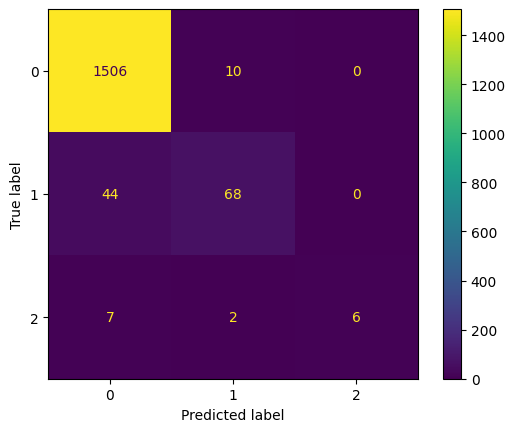

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9306147291539866
Precision: 0.9306147291539866
Recall: 0.9306147291539866


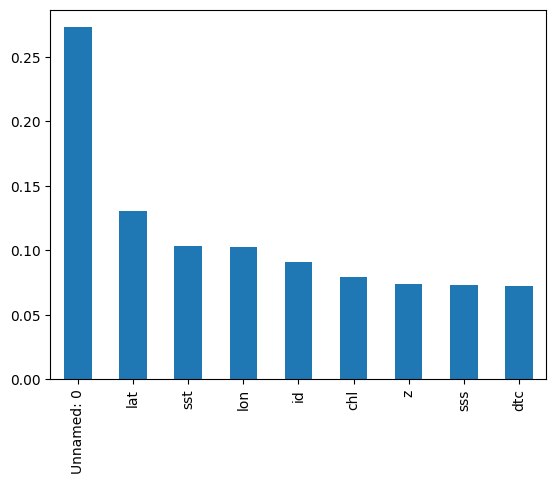

In [ ]:
X_train = pd.DataFrame(X_train)

# X_test = pd.DataFrame(X_test, columns=X.columns)
# column_names = X_train.columns.values.tolist()
# feature_importances = pd.Series(best_rf.feature_importances_, index= list(X_train.columns.values).sort_values(ascending=False))
# column_names = list(df.columns.values)
# Plot a simple bar chart


# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index= X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [ ]:
for col in X_train.columns:
    print(col)

Unnamed: 0
id
lon
lat
sss
chl
z
sst
dtc
